In [168]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import cmocean
import matplotlib.gridspec as gridspec

####################################################
# Plt Options from Perna, Lazzati & Cantiello 2017 #
####################################################
plt.rcParams['figure.figsize'] = (10,8) #(6,5)
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['legend.borderpad'] = 0.5
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
####################################################

BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

logteff=r'$\log_{10}\, T_{\rm eff}$/K'
logell=r'$\log_{10}\, L$/L$_\odot$'
logteff=r'$\log_{10}\, T_{\rm eff}\,/\,$K'
logell=r'$\log_{10}\, L\, / \, {\rm L}_\odot$'
rho_title = r'$\rho_{\rm AGN}$ [g cm$^{-3}$]'
logtstar=r'$\log_{10}\, T_{\star}\,/\,$K'
logtstar=r'$\log_{10}\, T_{\ast}\,/\,$K'


107015362.24430032
5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


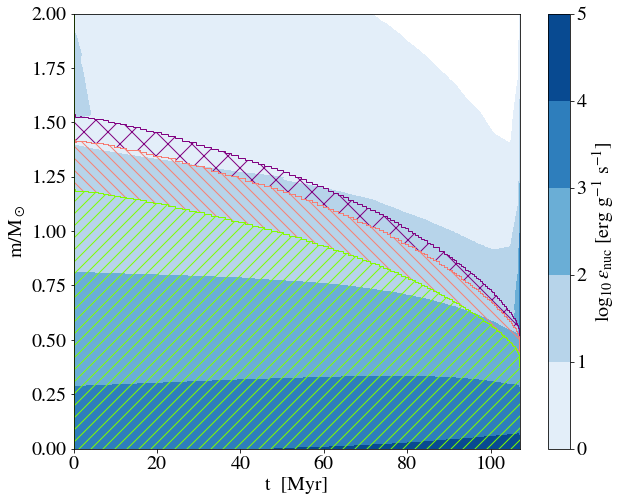

In [169]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first
DIR='work'
DIR='5.0'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "Myr",
        #function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = [],
        show_conv = True, show_therm = True, show_semi = False, show_over = True, show_rot = True, show_anon = True,
     #   levels = np.arange(0.0,16,1), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
#axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_xlabel(r"t  [Myr]")

axis.set_ylabel("m/M$_\odot$")



plt.ylim(0,2)
plt.xlim(0,max_age/1e6)

plt.savefig(DIR+"_kipp_m.pdf",bbox_inches='tight')


107015362.24430032
5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


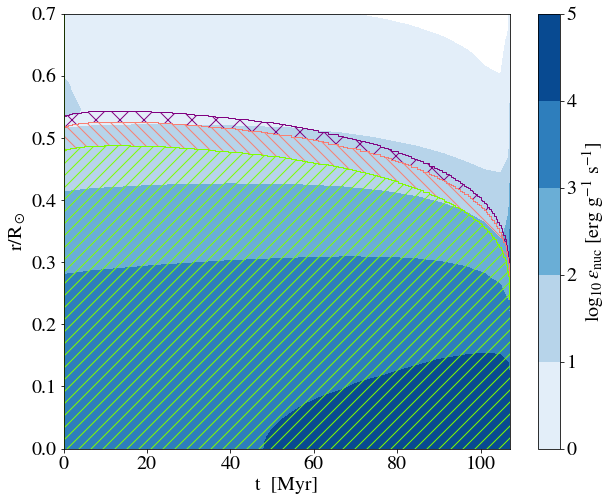

In [171]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first
DIR='work'
DIR='5.0'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "Myr",
        yaxis='radius',
        #yaxis_normalize = True,
        #function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = [],
        show_conv = True, show_therm = True, show_semi = False, show_over = True, show_rot = True, show_anon = True,
    #    levels = np.arange(0.0,16,1), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
#axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_xlabel(r"t  [Myr]")

axis.set_ylabel("r/R$_\odot$")



plt.ylim(0,0.7)
plt.xlim(0,max_age/1e6)

plt.savefig(DIR+"_kipp_r.pdf",bbox_inches='tight')


In [172]:
p = mesa_data.mesa_data(DIR+"/LOGS/profile12.data")

In [173]:
p.columns


{'zone': 0,
 'mass': 1,
 'logR': 2,
 'logT': 3,
 'logRho': 4,
 'logP': 5,
 'x_mass_fraction_H': 6,
 'y_mass_fraction_He': 7,
 'z_mass_fraction_metals': 8,
 'q': 9,
 'log_q': 10,
 'radius': 11,
 'temperature': 12,
 'rho': 13,
 'entropy': 14,
 'grada': 15,
 'cv': 16,
 'cp': 17,
 'log_CpT': 18,
 'csound': 19,
 'eps_nuc': 20,
 'pp': 21,
 'cno': 22,
 'tri_alfa': 23,
 'x': 24,
 'y': 25,
 'h1': 26,
 'he3': 27,
 'he4': 28,
 'opacity': 29,
 'lum_adv': 30,
 'lum_conv': 31,
 'lum_conv_MLT': 32,
 'lum_rad': 33,
 'gradT': 34,
 'gradr': 35,
 'grad_temperature': 36,
 'grad_density': 37,
 'gradL': 38,
 'gradr_div_grada': 39,
 'gradr_sub_grada': 40,
 'log_D_mix': 41,
 'log_D_conv': 42,
 'log_D_ovr': 43,
 'log_D_minimum': 44,
 'brunt_N2': 45,
 'brunt_N2_structure_term': 46,
 'brunt_N2_composition_term': 47,
 'brunt_frequency': 48,
 'lamb_Sl1': 49,
 'lamb_Sl2': 50}

<ipython-input-174-d6417542ad7b>:2: RuntimeWarning: divide by zero encountered in log10
  log_D_penetration = np.log10(D_pen)
<ipython-input-174-d6417542ad7b>:2: RuntimeWarning: invalid value encountered in log10
  log_D_penetration = np.log10(D_pen)


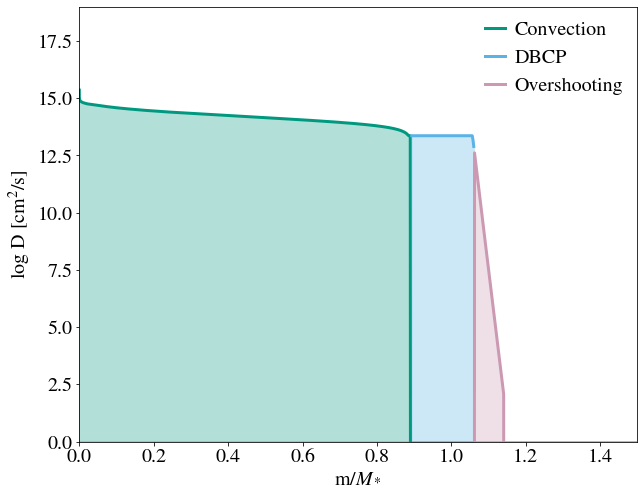

In [174]:
D_pen = 10**p.get("log_D_mix") - 10**p.get("log_D_conv") - 10**p.get("log_D_ovr")
log_D_penetration = np.log10(D_pen)
#plt.plot(p.get("mass"),p.get("log_D_mix"),lw=8,alpha=0.8,c='gray',label='log_D_mix')

fig = plt.figure()
ax = plt.gca()

ax.plot(p.get("mass"),p.get("log_D_conv"),alpha=1,lw=3,color=BLUE_GREEN,label='Convection')
ax.fill_between(p.get("mass"),p.get("log_D_conv"), color=BLUE_GREEN, alpha=.3)
#plt.plot(p.get("mass"),p.get("log_D_minimum"))

ax.plot(p.get("mass"),log_D_penetration,alpha=1,lw=3,c=SKY_BLUE,label='DBCP')
ax.fill_between(p.get("mass"),log_D_penetration, color=SKY_BLUE, alpha=.3)

ax.plot(p.get("mass"),p.get("log_D_ovr"),alpha=1,lw=3,c=RED_PURPLE,label='Overshooting')
ax.fill_between(p.get("mass"),p.get("log_D_ovr"), color=RED_PURPLE, alpha=.3)


leg = ax.legend(fontsize=20)

# set the linewidth of each legend object
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(10.0)
    

ax.set_ylabel(r"$\log$ D [cm$^2$/s]")
ax.set_xlabel(r"m/$M_*$")
ax.set_xlim(0,1.5)
ax.set_ylim(0,19)

FILENAME = "diffusivities.pdf"
plt.savefig(FILENAME,bbox_inches='tight')    


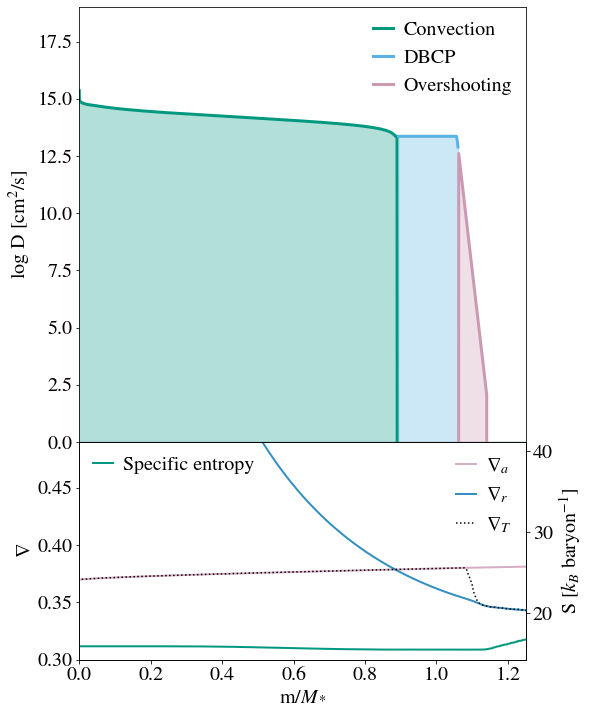

In [175]:
plt.rcParams['figure.figsize'] = (8,12)
#xylim=[4.9,3.97]
lw=2
gs1 = gridspec.GridSpec(2, 1,height_ratios=[2,1])
# No space between plots, e.g.: gs1.update(left=0.1, right=0.9, wspace=0.00,hspace=0.00)
gs1.update(wspace=0.00,hspace=0.00)
# Assign axis and remove xticks from top plot
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
#ax3 = plt.subplot(gs1[2,0])
ax1.set_xticks([])
#ax2.set_xticks([])





ax1.plot(p.get("mass"),p.get("log_D_conv"),alpha=1,lw=3,color=BLUE_GREEN,label='Convection')
ax1.fill_between(p.get("mass"),p.get("log_D_conv"), color=BLUE_GREEN, alpha=.3)
#plt.plot(p.get("mass"),p.get("log_D_minimum"))

ax1.plot(p.get("mass"),log_D_penetration,alpha=1,lw=3,c=SKY_BLUE,label='DBCP')
ax1.fill_between(p.get("mass"),log_D_penetration, color=SKY_BLUE, alpha=.3)

ax1.plot(p.get("mass"),p.get("log_D_ovr"),alpha=1,lw=3,c=RED_PURPLE,label='Overshooting')
ax1.fill_between(p.get("mass"),p.get("log_D_ovr"), color=RED_PURPLE, alpha=.3)




leg = ax1.legend(fontsize=20)

ax1.set_xlim(0,1.25)
ax1.set_ylim(0,19)

ax1.set_ylabel(r"$\log$ D [cm$^2$/s]")

ax2.plot(p.get("mass"),p.get("grada"),alpha=0.8,lw=2,color=RED_PURPLE,label=r'$\nabla_a$')

ax2.plot(p.get("mass"),p.get("gradr"),alpha=0.8,lw=2,color=BLUE,label=r'$\nabla_r$')
#ax2.plot(p.get("mass"),p.get("gradL"),alpha=1,lw=2,color=VERMILLION,label=r'$\nabla_L$')
#ax2.plot(p.get("mass"),p.get("grad_temperature"),alpha=1.0,lw=1,ls='--',color=BLACK,label=r'$\nabla_T$')
ax2.plot(p.get("mass"),p.get("grad_temperature"),alpha=1.0,lw=1.5,ls=':',color=BLACK,label=r'$\nabla_T$')
ax2b = ax2.twinx()
ax2b.plot(p.get("mass"),p.get("entropy"),alpha=1.0,lw=2,color=BLUE_GREEN,label=r'Specific entropy')

ax2b.legend(fontsize=20,loc=2)
ax2.legend(fontsize=20)


ax2.set_xlabel(r"m/$M_*$")

ax2.set_ylabel(r"$\nabla$")
ax2b.set_ylabel("S [$k_B$ baryon$^{-1}$]")



ax2.set_xlim(0,1.25)
ax2.set_ylim(0.3,0.49)

FILENAME = "kipp+grad.pdf"
plt.savefig(FILENAME,bbox_inches='tight')    


107015362.24430032
5.0/LOGS ['5.0/LOGS']
Reading profile data


No handles with labels found to put in legend.


Reading history data
Constructing mixing regions
there are 10 mixing zones


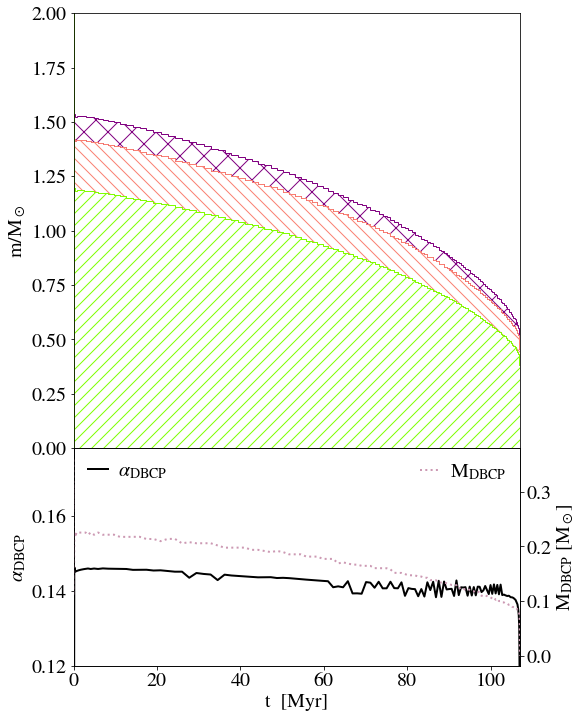

In [179]:
plt.rcParams['figure.figsize'] = (8,12)
#xylim=[4.9,3.97]
lw=2
gs1 = gridspec.GridSpec(2, 1,height_ratios=[2,1])
# No space between plots, e.g.: gs1.update(left=0.1, right=0.9, wspace=0.00,hspace=0.00)
gs1.update(wspace=0.00,hspace=0.00)
# Assign axis and remove xticks from top plot
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
#ax3 = plt.subplot(gs1[2,0])
ax1.set_xticks([])
#ax2.set_xticks([])



DIR='work'
DIR='5.0'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "Myr",
        #function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = [],
        show_conv = True, show_therm = True, show_semi = False, show_over = True, show_rot = True, show_anon = True,
        levels = [10,11], 
        save_file = False), axis = ax1)

#bar = ax1.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
#axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")

#ax1.set_xlabel(r"t  [Myr]")

ax1.set_ylabel("m/M$_\odot$")




leg = ax1.legend(fontsize=20)

ax1.set_xlim(0,max_age/1e6)
ax1.set_ylim(0,2)


ax2.plot(h.get("star_age")/1e6,h.get("alpha_pen_zone"),alpha=1.0,lw=2,color=BLACK,label=r'$\alpha_{\rm DBCP}$')
ax2b = ax2.twinx()

ax2b.plot(h.get("star_age")/1e6,h.get("mass_pen_zone"),alpha=1.0,lw=2,ls=':',color=RED_PURPLE,label=r'M$_{\rm DBCP}$')


#ax2.plot(p.get("mass"),p.get("grada"),alpha=0.8,lw=2,color=RED_PURPLE,label=r'$\nabla_a$')

#ax2.plot(p.get("mass"),p.get("gradr"),alpha=0.8,lw=2,color=BLUE,label=r'$\nabla_r$')
#ax2.plot(p.get("mass"),p.get("gradL"),alpha=1,lw=2,color=VERMILLION,label=r'$\nabla_L$')
#ax2.plot(p.get("mass"),p.get("grad_temperature"),alpha=1.0,lw=1,ls='--',color=BLACK,label=r'$\nabla_T$')
#ax2.plot(p.get("mass"),p.get("grad_temperature"),alpha=1.0,lw=1.5,ls=':',color=BLACK,label=r'$\nabla_T$')
#ax2b.plot(p.get("mass"),p.get("entropy"),alpha=1.0,lw=2,color=BLUE_GREEN,label=r'Specific entropy')

ax2b.legend(fontsize=20,loc=1)
ax2.legend(fontsize=20,loc=2)


ax2.set_xlabel(r"t  [Myr]")

ax2.set_ylabel(r"$\alpha_{\rm DBCP}$")
ax2b.set_ylabel(r"M$_{\rm DBCP}$ [M$_\odot$]")


ax2.set_xlim(0,max_age/1e6)
ax2.set_ylim(0.12,0.178)


FILENAME = "kipp+dbcp.pdf"
plt.savefig(FILENAME,bbox_inches='tight')    


In [177]:
h.columns

{'model_number': 0,
 'num_zones': 1,
 'star_age': 2,
 'log_dt': 3,
 'star_mass': 4,
 'log_xmstar': 5,
 'log_abs_mdot': 6,
 'mass_conv_core': 7,
 'conv_mx1_top': 8,
 'conv_mx1_bot': 9,
 'conv_mx2_top': 10,
 'conv_mx2_bot': 11,
 'mx1_top': 12,
 'mx1_bot': 13,
 'mx2_top': 14,
 'mx2_bot': 15,
 'mix_type_1': 16,
 'mix_qtop_1': 17,
 'mix_type_2': 18,
 'mix_qtop_2': 19,
 'mix_type_3': 20,
 'mix_qtop_3': 21,
 'mix_type_4': 22,
 'mix_qtop_4': 23,
 'mix_type_5': 24,
 'mix_qtop_5': 25,
 'mix_type_6': 26,
 'mix_qtop_6': 27,
 'mix_type_7': 28,
 'mix_qtop_7': 29,
 'mix_type_8': 30,
 'mix_qtop_8': 31,
 'mix_type_9': 32,
 'mix_qtop_9': 33,
 'mix_type_10': 34,
 'mix_qtop_10': 35,
 'mix_relr_type_1': 36,
 'mix_relr_top_1': 37,
 'mix_relr_type_2': 38,
 'mix_relr_top_2': 39,
 'mix_relr_type_3': 40,
 'mix_relr_top_3': 41,
 'mix_relr_type_4': 42,
 'mix_relr_top_4': 43,
 'mix_relr_type_5': 44,
 'mix_relr_top_5': 45,
 'mix_relr_type_6': 46,
 'mix_relr_top_6': 47,
 'mix_relr_type_7': 48,
 'mix_relr_top_7': 49,